In [85]:
# Загружаем библиотеки:
# для работы с математикой
import numpy as np
# для построения графиков
import matplotlib.pyplot as plt
# для преобразования выражений
import sympy as sym

#### Задание 1

Вычислить вектор градиента функции
$$    
f(X) = 2x_1^3 - 3x_1x_2 + 2x_2x_3^2 - x_2^3
$$
Частные производные
$$
grad f(X) = 
\begin{pmatrix}
  6x_1^2 - 3x_2\\
  - 3x_1 + 2x_3^2 - 3x_2^2\\
  4x_2x_3
\end{pmatrix}
$$
В точке M = (2, 1, 1):
$$
grad f(X) = 
\begin{pmatrix}
  21\\
  - 7\\
  4
\end{pmatrix}
$$

In [162]:
# Точка для рассчёта
M = [2, 1, 1]

# Объявляем символы
x1 = sym.symbols('x1')
x2 = sym.symbols('x2')
x3 = sym.symbols('x3')

# Исходная функция
f = 2 * x1 ** 3 - 3 * x1 * x2 + 2 * x2 * x3 ** 2 - x2 ** 3
# Частные производные
grad_f = np.zeros(3, dtype = int)
for i in range(0, 3):
    x = 'x' + str(i + 1)
    f_diff = sym.diff(f, x)
    print(f'Частная производная по {x}: {f_diff}\n')
    grad_f[i] = f_diff.evalf(3, subs = {x1: M[0], x2: M[1], x3: M[2]})
print(f'Вектор градиента {grad_f}')

Частная производная по x1: 6*x1**2 - 3*x2

Частная производная по x2: -3*x1 - 3*x2**2 + 2*x3**2

Частная производная по x3: 4*x2*x3

Вектор градиента [21 -7  4]


In [164]:
# Матрица Гессе
H_f = np.zeros((3, 3), dtype = int)

# Частные производные
# Перебираем строки
for i in range(0, 3):
    # Перебираем столбцы
    for j in range(0, 3):
        # Первая частная производная
        x = 'x' + str(i + 1)
        f_1 = sym.diff(f, x)
        # Вторая частная производная
        x = 'x' + str(j + 1)
        f_2 = sym.diff(f_1, x)
        # Сохраняем результат
        H_f[i, j] = f_2.evalf(3, subs = {x1: M[0], x2: M[1], x3: M[2]})
        # Выводим преобразованные выражения
        print(f_2)
        
print(f'\nМатрица Гессе\n{H_f}')

12*x1
-3
0
-3
-6*x2
4*x3
0
4*x3
4*x2

Матрица Гессе
[[24 -3  0]
 [-3 -6  4]
 [ 0  4  4]]


#### Задание 2

In [82]:
# Сетка координат по осям X и Y
x1 = np.arange(-10, 10, 0.1)
x2 = np.arange(-10, 10, 0.1)
X1, X2 = np.meshgrid(x1, x2)

# Функция двух переменных
f = X2 ** 2 - X1 ** 2 * X2 + 2 * X1 * X2

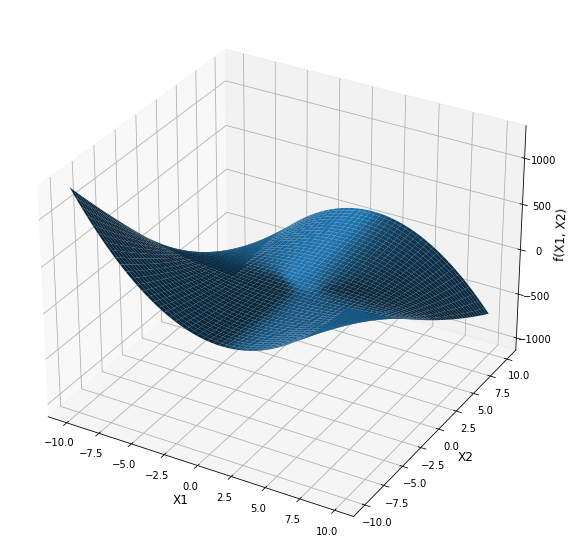

In [83]:
# График функции

# Размеры поля графика
fig = plt.figure(figsize = (10, 10)) 
# Используем 3D-проекцию 
ax = fig.gca(projection = '3d')

# Изображение графика функции
ax.plot_surface(X1, X2, f)

# Подписи осей
ax.set_xlabel('X1', fontsize = 'large')
ax.set_ylabel('X2', fontsize = 'large')
ax.set_zlabel('f(X1, X2)', fontsize = 'large')

plt.show()

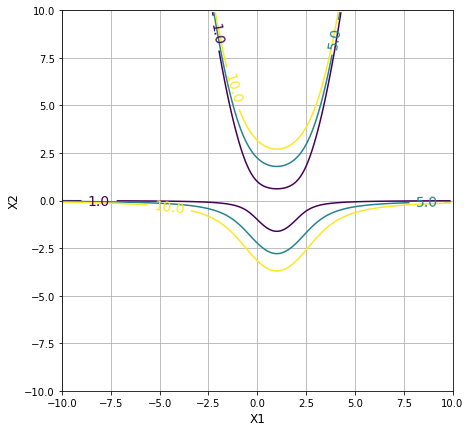

In [84]:
# Размеры поля графика
fig = plt.figure(figsize = (7, 7)) 
# Двумерный график
ax = fig.subplots()
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.grid(True)
# Линии уровня
CS = ax.contour(X, Y, f, (1, 5, 10))
# Значения линий уровня
ax.clabel(CS, inline = True, fontsize = 14, fmt = '%1.1f')
# Подписи осей
ax.set_xlabel('X1', fontsize = 'large')
ax.set_ylabel('X2', fontsize = 'large')

plt.show()